### scikit-learn dataset 사용
- load_dataset(): scikit-learn 저장소에서 로딩
- fetch_XXX (): dataset 저장소에서 가져오기

In [3]:
from sklearn.datasets import load_diabetes
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [4]:
data = load_diabetes()
type(data)

sklearn.utils._bunch.Bunch

### 당뇨병 유무 체크 -> 8개 특성 + 1개 라벨

In [6]:
# DESCR 속성 -> 데이터에 관한 상세정보 알려줌
data['DESCR']

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - age     age in years\n      - sex\n      - bmi     body mass index\n      - bp      average blood pressure\n      - s1      tc, total serum cholesterol\n      - s2      ldl, low-density lipoproteins\n      - s3      hdl, high-density lipoproteins\n      - s4      tch, total cholesterol / HDL\n      - s5      ltg, possibly log of serum triglycerides level\n      - s6      glu, blood sugar

## Logistic Regression
- 인공신경망의 기본 개념과 동일
- Regression이지만 이진분류로 사용
- 선형모델 기반으로 y=wx+b 사용
- y=wx+b의 결과 -> sigmoid() 사용

### 성적-합격/불합격 분류 실습
#### 1. 데이터 준비

In [9]:
# 모듈 로딩
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [14]:
x = [89,95,96,98,100]    # 점수
y = [0,0,0,1,1]          # 합격여부(합격-1, 불합격-0)
# 형 변환
x = np.array(x).reshape(-1,1)
y = np.array(y)
# 데이터 체크
print('x: ', x.shape, 'y: ', y.shape)

x:  (5, 1) y:  (5,)


#### 2. 데이터 확인 -> 시각화
- sigmoid 함수
    - numpy 모듈: numpy.exp()

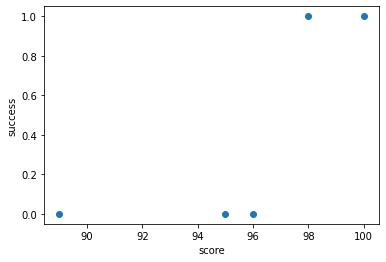

In [20]:
plt.scatter(x,y, marker='o')
plt.xlabel('score')
plt.ylabel('success')
plt.show()

#### 3. 모델 생성&학습
- n_features_in_ : 특성 개수
- classes : 분류 종류
- penalty 변수 , c 변수

In [27]:
lor = LogisticRegression()
lor.fit(x,y)
print(lor.classes_, lor.coef_, lor.intercept_, lor.n_features_in_)

[0 1] [[0.96292189]] [-93.5375712] 1


#### 4. 평가 -> score() 함수 

In [28]:
lor.score(x,y)

1.0

#### 5. 테스트 -> predict(): 새로운 데이터로 
- predict_proba : 확률 여부 반환
- 결정함수 -> decision_function 함수와 밑의 부분이랑 계산값이 같다. 

In [31]:
preY = lor.predict([[82]])

print(f"예측결과: {preY}")

예측결과: [0]


In [33]:
probaY = lor.predict_proba([[82]])
probaY
# [0일 확률, 1일 확률]

array([[9.99999533e-01, 4.66514667e-07]])

In [36]:
# 결정함수 -> decision_function 함수와 밑의 부분이랑 계산값이 같다. 
print(lor.decision_function([[82]]))
print(lor.coef_*82 + lor.intercept_)

[-14.57797591]
[[-14.57797591]]
